# Evaluacion de los algoritmos: RF, con los dataset: <br>
### Dataset Min-Max, entrenado con Tra y convertido de esa manera Test <br>
### Dataset Min-Max, entrenado con tra y convertido; entrenado con Test y convertido 
### Dataset NO normalizado <br>


.- Tiempo <br>
.- Score <br>
.- Matrices de confusión <br>
.- Classification report ( Precision, Recall, f1-score, support)<br>

In [1]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [2]:
clases_binarias=['Normal','Ataque']
#corresponde a 'Normal=0, Ataque=1
clases_5=['dos','normal','probe','r2l','u2r']
#corresponde a dos=0; normal=1, probe=2
#aunque posiblemente de error poque están definidos desde 1 en vez de 0, porque azeem

## Reading the libraries

In [3]:
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)#Prueba evaluación y entrenamiento un solo individuo. 
#Vectores completos
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definicion de la matriz de confusion

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm= confussion matriz
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión normalizada")
    else:
        print('Matriz de Confusión')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiquetas Originales')
    plt.xlabel('Etiquetas Predecidas')


In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [6]:
#NSL TESTING LABELS

#Index binary (2 clases)
L_nsl_testing_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_testing_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_testing_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_testing_indextipeofattack.csv")


#nsl TRAINING LABELS
# 2 clases
L_nsl_training_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_training_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_training_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_training_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_training_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_training_indextipeofattack.csv")

# 1) Dataset Min-Max, entrenado con Tra y convertido de esa manera Test <br>

# Reading the Datasets with the labels

In [7]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Test.csv')


# 2 clases

In [8]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [9]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.5760509967803955 seconds ---


In [10]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11342906951904297 seconds ---


In [11]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.68      0.97      0.80      9710
          1       0.97      0.66      0.78     12833

avg / total       0.85      0.79      0.79     22543



In [12]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17862
Porcentaje de exactitud: 0.792352393204 (accuracy score)


In [13]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9450,  260],
       [4421, 8412]])

Matriz de Confusión
[[9450  260]
 [4421 8412]]


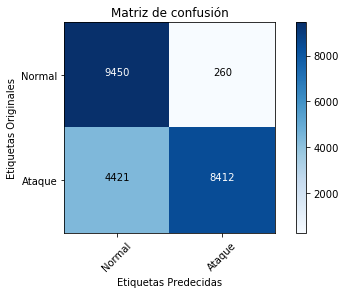

In [14]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.97  0.03]
 [ 0.34  0.66]]


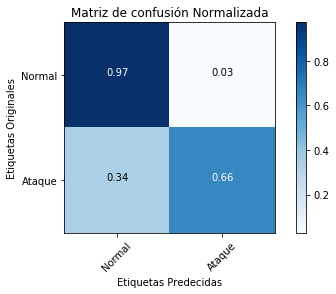

In [15]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [16]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [17]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.7738611698150635 seconds ---


In [18]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11325192451477051 seconds ---


In [19]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.82      0.88      7458
          2       0.66      0.97      0.79      9710
          3       0.82      0.59      0.69      2421
          4       0.99      0.05      0.10      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.72     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17143
Porcentaje de exactitud: 0.760457791776 (accuracy score)


In [21]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[6114, 1252,   92,    0,    0],
       [  65, 9450,  194,    1,    0],
       [ 236,  755, 1430,    0,    0],
       [   0, 2591,   14,  149,    0],
       [   0,  188,   12,    0,    0]])

Matriz de Confusión
[[6114 1252   92    0    0]
 [  65 9450  194    1    0]
 [ 236  755 1430    0    0]
 [   0 2591   14  149    0]
 [   0  188   12    0    0]]


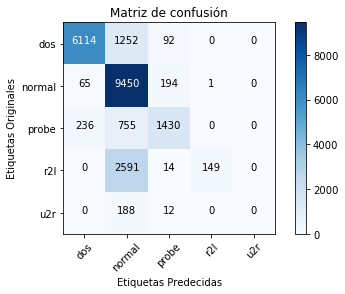

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[  8.20e-01   1.68e-01   1.23e-02   0.00e+00   0.00e+00]
 [  6.69e-03   9.73e-01   2.00e-02   1.03e-04   0.00e+00]
 [  9.75e-02   3.12e-01   5.91e-01   0.00e+00   0.00e+00]
 [  0.00e+00   9.41e-01   5.08e-03   5.41e-02   0.00e+00]
 [  0.00e+00   9.40e-01   6.00e-02   0.00e+00   0.00e+00]]


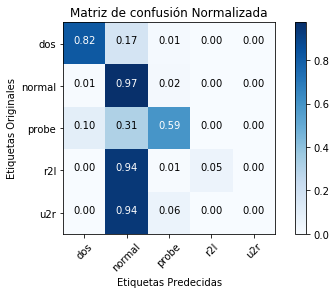

In [23]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [24]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.82      0.88      7458
          2       0.66      0.97      0.79      9710
          3       0.82      0.59      0.69      2421
          4       0.99      0.05      0.10      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.72     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.760457791776 (accuracy score)


# 2) Dataset Min-Max, entrenado con tra y convertido; entrenado con Test y convertido 

# Reading the Datasets with the labels

In [26]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Datasets_for_evaluation/Min_Max_Entrenado_Tra_Y_Test_No_Parametro_comun/MINMAX_TRATEST_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Datasets_for_evaluation/Min_Max_Entrenado_Tra_Y_Test_No_Parametro_comun/MINMAX_TRATEST_NSL_Test.csv')


# 2 clases

In [27]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [28]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.7820501327514648 seconds ---


In [29]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.10846209526062012 seconds ---


In [30]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.64      0.97      0.77      9710
          1       0.97      0.59      0.73     12833

avg / total       0.83      0.76      0.75     22543



In [31]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17047
Porcentaje de exactitud: 0.75619926363 (accuracy score)


In [32]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9438,  272],
       [5224, 7609]])

Matriz de Confusión
[[9438  272]
 [5224 7609]]


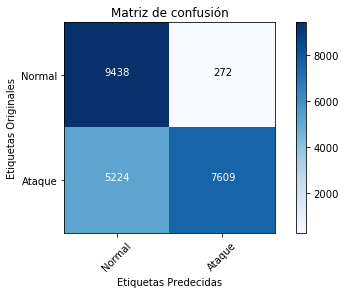

In [33]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.97  0.03]
 [ 0.41  0.59]]


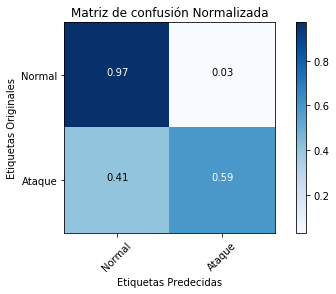

In [34]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [35]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [36]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.7872869968414307 seconds ---


In [37]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11593794822692871 seconds ---


In [38]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.97      0.79      0.87      7458
          2       0.65      0.97      0.78      9710
          3       0.85      0.66      0.74      2421
          4       0.97      0.03      0.05      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.71     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17028
Porcentaje de exactitud: 0.755356429934 (accuracy score)


In [40]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[5923, 1493,   42,    0,    0],
       [  64, 9444,  202,    0,    0],
       [ 122,  708, 1591,    0,    0],
       [   0, 2650,   34,   70,    0],
       [   2,  183,   13,    2,    0]])

Matriz de Confusión
[[5923 1493   42    0    0]
 [  64 9444  202    0    0]
 [ 122  708 1591    0    0]
 [   0 2650   34   70    0]
 [   2  183   13    2    0]]


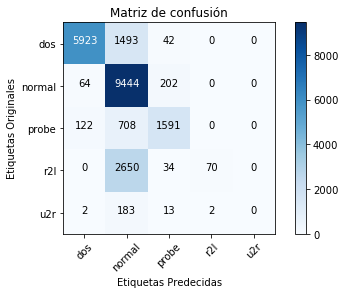

In [41]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.79  0.2   0.01  0.    0.  ]
 [ 0.01  0.97  0.02  0.    0.  ]
 [ 0.05  0.29  0.66  0.    0.  ]
 [ 0.    0.96  0.01  0.03  0.  ]
 [ 0.01  0.92  0.07  0.01  0.  ]]


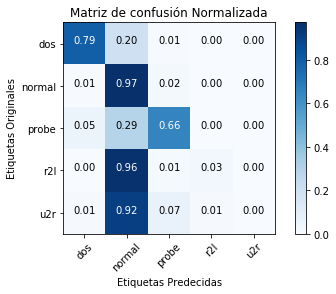

In [42]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [43]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.97      0.79      0.87      7458
          2       0.65      0.97      0.78      9710
          3       0.85      0.66      0.74      2421
          4       0.97      0.03      0.05      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.71     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.755356429934 (accuracy score)


# 3) Dataset NO normalizado

# Reading the Datasets with the labels

In [45]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Datasets_for_evaluation/No_normalizado_total_40_dimension/ORIGINAL_40_DIM_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Datasets_for_evaluation/No_normalizado_total_40_dimension/ORIGINAL_40_DIM_NSL_Test.csv')


# RF. Original datasets

# 2 clases

In [46]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [47]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.9157280921936035 seconds ---


In [48]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11786770820617676 seconds ---


In [49]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.67      0.97      0.79      9710
          1       0.97      0.63      0.76     12833

avg / total       0.84      0.78      0.78     22543



In [50]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17537
Porcentaje de exactitud: 0.777935501042 (accuracy score)


In [51]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9449,  261],
       [4745, 8088]])

Matriz de Confusión
[[9449  261]
 [4745 8088]]


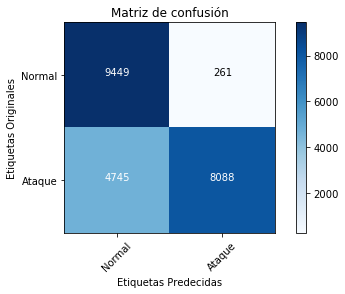

In [52]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.97  0.03]
 [ 0.37  0.63]]


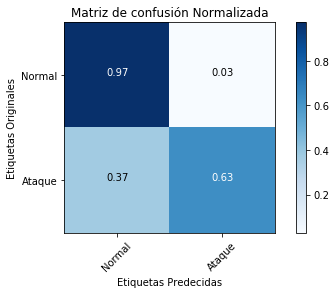

In [53]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [54]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [55]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.7072000503540039 seconds ---


In [56]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.12289786338806152 seconds ---


In [57]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.76      0.85      7458
          2       0.67      0.97      0.79      9710
          3       0.76      0.75      0.76      2421
          4       0.99      0.07      0.12      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.72     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17115
Porcentaje de exactitud: 0.759215721066 (accuracy score)


In [59]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[5660, 1427,  371,    0,    0],
       [  82, 9446,  181,    1,    0],
       [ 156,  439, 1826,    0,    0],
       [   1, 2566,    4,  183,    0],
       [   0,  181,   19,    0,    0]])

Matriz de Confusión
[[5660 1427  371    0    0]
 [  82 9446  181    1    0]
 [ 156  439 1826    0    0]
 [   1 2566    4  183    0]
 [   0  181   19    0    0]]


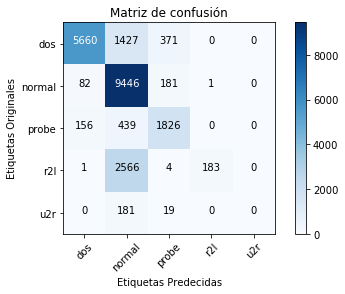

In [60]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[  7.59e-01   1.91e-01   4.97e-02   0.00e+00   0.00e+00]
 [  8.44e-03   9.73e-01   1.86e-02   1.03e-04   0.00e+00]
 [  6.44e-02   1.81e-01   7.54e-01   0.00e+00   0.00e+00]
 [  3.63e-04   9.32e-01   1.45e-03   6.64e-02   0.00e+00]
 [  0.00e+00   9.05e-01   9.50e-02   0.00e+00   0.00e+00]]


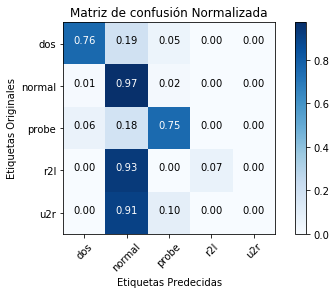

In [61]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [62]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.76      0.85      7458
          2       0.67      0.97      0.79      9710
          3       0.76      0.75      0.76      2421
          4       0.99      0.07      0.12      2754
          5       0.00      0.00      0.00       200

avg / total       0.81      0.76      0.72     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.759215721066 (accuracy score)
